<a href="https://colab.research.google.com/github/Jorge-89/Regresion-Lineal-/blob/main/Regresi%C3%B3n_Lineal_Estandarizada_(TP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importo librerias necesarias
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error as mse
from sklearn.pipeline import Pipeline
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import datasets, linear_model

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
#se importa el set de datos
url = 'https://raw.githubusercontent.com/Jorge-89/Analisis-espacial-en-Python-COVID-19/Jorge-89-/-Analisis-espacial-en-Python-COVID-19/base_datos_estaciones_met_V3.csv'
df = pd.read_csv(url, sep=";")
df.columns

Index(['fecha_completa', 'Fecha', 'Hora', 'Temp_Alicia AgriculturaCba',
       'Humedad_Alicia AgriculturaCba', 'PP_Alicia AgriculturaCba',
       'Temp_Las Varas AgriculturaCba', 'Humedad_Las Varas AgriculturaCba',
       'PP_Las Varas AgriculturaCba',
       'Temp_San Miguel - Establecimiento Don Luis',
       'Humedad_San Miguel - Establecimiento Don Luis',
       'PP_San Miguel - Establecimiento Don Luis',
       'Temp_San Miguel - Listello', 'Humedad_San Miguel - Listello',
       'PP_San Miguel - Listello', 'Temp_ San Miguel - Las Varillas',
       'Humedad_ San Miguel - Las Varillas', 'PP_ San Miguel - Las Varillas'],
      dtype='object')

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [ ]:
df1=df[['Temp_Alicia AgriculturaCba',
       'Humedad_Alicia AgriculturaCba', 'PP_Alicia AgriculturaCba',
       'Temp_Las Varas AgriculturaCba', 'Humedad_Las Varas AgriculturaCba',
       'PP_Las Varas AgriculturaCba',
       'Temp_San Miguel - Establecimiento Don Luis',
       'Humedad_San Miguel - Establecimiento Don Luis',
       'PP_San Miguel - Establecimiento Don Luis',
       'Temp_San Miguel - Listello', 'Humedad_San Miguel - Listello',
       'PP_San Miguel - Listello', 'Temp_ San Miguel - Las Varillas',
       'Humedad_ San Miguel - Las Varillas', 'PP_ San Miguel - Las Varillas']]

In [ ]:
#normalizamos los datos
scaler=StandardScaler()

scaler.fit(df1) # calculo la media para poder hacer la transformacion
X_scaled=scaler.transform(df1)# Ahora si, escalo los datos y los normalizo
 
#Instanciamos objeto PCA y aplicamos
pca=PCA(n_components=2) # Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
pca.fit(X_scaled) # obtener los componentes principales
X_pca=pca.transform(X_scaled) # convertimos nuestros datos con las nuevas dimensiones de PCA

In [ ]:
print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:2]))
#Vemos que con 2 componentes tenemos algo mas del 70% de varianza explicada

shape of X_pca (12960, 2)
[0.61595131 0.1564035 ]
suma: 0.7723548033368404


In [ ]:
componentes= pd.DataFrame(X_pca, columns= ["pc1", "pc2"] )

In [ ]:
estandarizado= pd.DataFrame(X_scaled, columns= ['Temp_Alicia AgriculturaCba',
       'Humedad_Alicia AgriculturaCba', 'PP_Alicia AgriculturaCba',
       'Temp_Las Varas AgriculturaCba', 'Humedad_Las Varas AgriculturaCba',
       'PP_Las Varas AgriculturaCba',
       'Temp_San Miguel - Establecimiento Don Luis',
       'Humedad_San Miguel - Establecimiento Don Luis',
       'PP_San Miguel - Establecimiento Don Luis',
       'Temp_San Miguel - Listello', 'Humedad_San Miguel - Listello',
       'PP_San Miguel - Listello', 'Temp_ San Miguel - Las Varillas',
       'Humedad_ San Miguel - Las Varillas', 'PP_ San Miguel - Las Varillas'] )

In [ ]:
result = pd.concat([estandarizado, componentes], axis=1)
matriz_corr=result.corr()
matriz_corr

,Temp_Alicia AgriculturaCba,Humedad_Alicia AgriculturaCba,PP_Alicia AgriculturaCba,Temp_Las Varas AgriculturaCba,Humedad_Las Varas AgriculturaCba,PP_Las Varas AgriculturaCba,Temp_San Miguel - Establecimiento Don Luis,Humedad_San Miguel - Establecimiento Don Luis,PP_San Miguel - Establecimiento Don Luis,Temp_San Miguel - Listello,Humedad_San Miguel - Listello,PP_San Miguel - Listello,Temp_ San Miguel - Las Varillas,Humedad_ San Miguel - Las Varillas,PP_ San Miguel - Las Varillas,pc1,pc2
Temp_Alicia AgriculturaCba,1.000000,-0.855478,-0.046852,0.986934,-0.849260,-0.054520,0.981354,-0.852691,-0.038764,0.984871,-0.867068,-0.012581,0.986801,-0.869937,-0.052938,9.609626e-01,6.222969e-02
Humedad_Alicia AgriculturaCba,-0.855478,1.000000,0.092315,-0.847509,0.976913,0.104700,-0.843577,0.970052,0.085725,-0.849606,0.973638,0.025532,-0.837187,0.982313,0.096491,-9.524895e-01,2.049911e-02
PP_Alicia AgriculturaCba,-0.046852,0.092315,1.000000,-0.041179,0.087344,0.435590,-0.037308,0.080291,0.299814,-0.042569,0.080602,0.196187,-0.041419,0.086333,0.621443,-9.018079e-02,7.891682e-01
Temp_Las Varas AgriculturaCba,0.986934,-0.847509,-0.041179,1.000000,-0.860043,-0.054480,0.983767,-0.850658,-0.034398,0.991461,-0.870375,-0.010651,0.988431,-0.870158,-0.050098,9.623945e-01,6.687047e-02
Humedad_Las Varas AgriculturaCba,-0.849260,0.976913,0.087344,-0.860043,1.000000,0.100670,-0.844531,0.970140,0.077085,-0.854681,0.983466,0.026863,-0.839664,0.980746,0.095457,-9.547405e-01,1.493478e-02
PP_Las Varas AgriculturaCba,-0.054520,0.104700,0.435590,-0.054480,0.100670,1.000000,-0.045221,0.090830,0.328748,-0.051575,0.093559,0.253571,-0.050341,0.099080,0.449902,-1.007165e-01,7.355644e-01
Temp_San Miguel - Establecimiento Don Luis,0.981354,-0.843577,-0.037308,0.983767,-0.844531,-0.045221,1.000000,-0.865415,-0.036565,0.982220,-0.866812,-0.000766,0.982729,-0.867195,-0.045403,9.588858e-01,7.371804e-02
Humedad_San Miguel - Establecimiento Don Luis,-0.852691,0.970052,0.080291,-0.850658,0.970140,0.090830,-0.865415,1.000000,0.073960,-0.855091,0.972979,0.015508,-0.841654,0.974240,0.085600,-9.537078e-01,2.328495e-03
PP_San Miguel - Establecimiento Don Luis,-0.038764,0.085725,0.299814,-0.034398,0.077085,0.328748,-0.036565,0.073960,1.000000,-0.032762,0.067897,0.168494,-0.030841,0.072385,0.254292,-7.496491e-02,5.579260e-01
Temp_San Miguel - Listello,0.984871,-0.849606,-0.042569,0.991461,-0.854681,-0.051575,0.982220,-0.855091,-0.032762,1.000000,-0.875068,-0.010471,0.986959,-0.874899,-0.051024,9.629514e-01,6.726678e-02


In [ ]:
x= estandarizado[[ 'Temp_Las Varas AgriculturaCba', 'Humedad_Las Varas AgriculturaCba',
        'Temp_San Miguel - Establecimiento Don Luis', 'Humedad_San Miguel - Establecimiento Don Luis',
       'Temp_San Miguel - Listello', 'Humedad_San Miguel - Listello',
       'Temp_ San Miguel - Las Varillas', 'Humedad_ San Miguel - Las Varillas']]
y= estandarizado["Temp_Alicia AgriculturaCba"]

In [ ]:
estandarizado.describe()

,Temp_Alicia AgriculturaCba,Humedad_Alicia AgriculturaCba,PP_Alicia AgriculturaCba,Temp_Las Varas AgriculturaCba,Humedad_Las Varas AgriculturaCba,PP_Las Varas AgriculturaCba,Temp_San Miguel - Establecimiento Don Luis,Humedad_San Miguel - Establecimiento Don Luis,PP_San Miguel - Establecimiento Don Luis,Temp_San Miguel - Listello,Humedad_San Miguel - Listello,PP_San Miguel - Listello,Temp_ San Miguel - Las Varillas,Humedad_ San Miguel - Las Varillas,PP_ San Miguel - Las Varillas
count,1.296000e+04,1.296000e+04,1.296000e+04,1.296000e+04,1.296000e+04,1.296000e+04,1.296000e+04,1.296000e+04,1.296000e+04,1.296000e+04,1.296000e+04,1.296000e+04,1.296000e+04,1.296000e+04,1.296000e+04
mean,-7.210624e-16,5.076015e-16,1.401993e-15,3.216391e-16,-4.850373e-16,2.665199e-16,-2.093661e-16,2.197471e-15,-1.651125e-15,-1.664752e-15,-2.452257e-16,-6.248431e-16,1.710566e-16,1.882565e-15,1.850622e-15
std,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00
min,-2.218312e+00,-2.729153e+00,-8.922679e-02,-2.163675e+00,-2.869126e+00,-9.734247e-02,-2.122155e+00,-3.031233e+00,-8.524951e-02,-2.098326e+00,-2.856023e+00,-1.208888e-01,-2.246280e+00,-2.776508e+00,-9.588479e-02
25%,-7.425929e-01,-8.390155e-01,-8.922679e-02,-7.532768e-01,-8.165049e-01,-9.734247e-02,-7.566682e-01,-7.830206e-01,-8.524951e-02,-7.444844e-01,-8.444079e-01,-1.208888e-01,-7.336954e-01,-8.820949e-01,-9.588479e-02
50%,-1.591691e-01,2.126051e-01,-8.922679e-02,-1.856775e-01,2.646085e-01,-9.734247e-02,-1.666431e-01,3.168592e-01,-8.524951e-02,-1.735874e-01,3.266353e-01,-1.208888e-01,-1.644431e-01,3.002012e-01,-9.588479e-02
75%,7.502855e-01,8.982431e-01,-8.922679e-02,7.775213e-01,8.774056e-01,-9.734247e-02,7.942550e-01,8.607426e-01,-8.524951e-02,7.398477e-01,8.931577e-01,-1.208888e-01,7.788893e-01,9.027614e-01,-9.588479e-02
max,2.500557e+00,1.278124e+00,4.061532e+01,2.463119e+00,1.385579e+00,3.715951e+01,2.513757e+00,1.213237e+00,3.805422e+01,2.583029e+00,1.164904e+00,2.957995e+01,2.470382e+00,1.190347e+00,3.480348e+01


In [ ]:
#Separo los datos de "train" en entrenamiento y prueba "test" para probar los algoritmos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
#se tarda demasiado al lograr estimar un CV con polinomios mayores a 5.
modelo = Pipeline([('features', PolynomialFeatures()),
                    ('regression', LinearRegression(fit_intercept=False))
                    ])
hyperparameters={'features__degree':[1,2,3,4,5]}
grilla=GridSearchCV(modelo,hyperparameters,refit=True, cv=5,scoring='neg_mean_squared_error',)
grilla.fit(x_train,y_train)



GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('features',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('regression',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=False,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'features__degree': [1, 2, 3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_trai

In [ ]:
print(grilla.best_params_)
#Mejor polinomio es de grado 3



{'features__degree': 3}


In [ ]:
grilla.cv_results_

{'mean_fit_time': array([0.01368747, 0.0322073 , 0.15120816, 0.42462945, 2.19718256]),
 'mean_score_time': array([0.0038641 , 0.00306449, 0.00835891, 0.01342187, 0.02158694]),
 'mean_test_score': array([-0.01844153, -0.01685693, -0.01467494, -0.01794816, -0.38104584]),
 'param_features__degree': masked_array(data=[1, 2, 3, 4, 5],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'features__degree': 1},
  {'features__degree': 2},
  {'features__degree': 3},
  {'features__degree': 4},
  {'features__degree': 5}],
 'rank_test_score': array([4, 2, 1, 3, 5], dtype=int32),
 'split0_test_score': array([-0.01813762, -0.016662  , -0.01404171, -0.01490999, -0.21385626]),
 'split1_test_score': array([-0.01907681, -0.01766818, -0.0157355 , -0.01611153, -0.30564399]),
 'split2_test_score': array([-0.01845682, -0.01648674, -0.01441374, -0.01455529, -0.02669423]),
 'split3_test_score': array([-0.01789532, -0.01629416, -0.01387509, -

1 0.018441526882809235
2 0.01685693032800916
3 0.014674937428775885
4 0.01794815857298755
5 0.3810458407477123


Text(0, 0.5, 'RMSE en validacion')

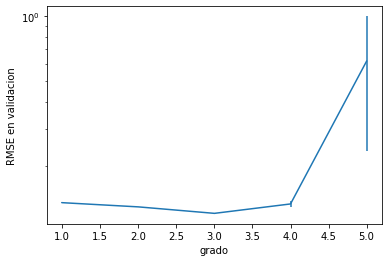

In [ ]:
for ni, i in enumerate(grilla.cv_results_['params']):
  print(i['features__degree'],-grilla.cv_results_['mean_test_score'][ni])
plt.errorbar(grilla.cv_results_['param_features__degree'].data,np.sqrt(-grilla.cv_results_['mean_test_score']),yerr=grilla.cv_results_['std_test_score'])
plt.yscale('log')
plt.xlabel('grado')
plt.ylabel('RMSE en validacion')


In [ ]:
modelo=Pipeline([['poly',PolynomialFeatures(degree=1,include_bias=True)],['regressor',LinearRegression(fit_intercept=True)]])
#entreno el modelo de grado 1 con los datos de entrenamiento
modelo.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=1, include_bias=True,
                                    interaction_only=False, order='C')),
                ['regressor',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False)]],
         verbose=False)

In [ ]:
#hago las predicciones con x_test
y_pred_test = modelo.predict(x_test)
y_pred_test


array([ 0.97268867,  1.42395678, -0.39117422, ...,  0.33963234,
       -1.13296515,  0.04975398])

In [ ]:

print('Precisión del modelo usando la raíz del error cuadratico medio (RMSE):')
score_testeo = mean_squared_error(y_test,y_pred_test,squared=True)

print (score_testeo)


Precisión del modelo usando la raíz del error cuadratico medio (RMSE):
0.01996161468443678


In [ ]:
print('DATOS DEL MODELO REGRESIÓN LINEAL SIMPLE')
print()
print('Valor de los coeficientes de cada variale regresora usada en el modelo:')
print(modelo['regressor'].coef_)
print()
print('Valor de la intersección o coeficiente "b":')
print(modelo['regressor'].intercept_)




DATOS DEL MODELO REGRESIÓN LINEAL SIMPLE

Valor de los coeficientes de cada variale regresora usada en el modelo:
[ 0.          0.35543066  0.05000222  0.11668241 -0.0714629   0.13331682
  0.06912553  0.36995571 -0.07000102]

Valor de la intersección o coeficiente "b":
-0.0002667719782474458
